In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('../Data/Distribuidora.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,1/14/2022,Northeast,New York,New York,Coca-Cola,25,USPS,$0.50,"12,000","$6,000","$3,000",50%
1,Walmart,1185732,1/14/2022,Northeast,New York,New York,Diet Coke,34,FedEx,$0.50,"10,000","$5,000","$1,500",30%
2,Walmart,1185732,1/14/2022,Northeast,New York,New York,Sprite,48,UPS,$0.40,"10,000","$4,000","$1,400",35%
3,Walmart,1185732,1/14/2022,Northeast,New York,New York,Fanta,20,USPS,$0.45,"8,500","$3,825","$1,339",35%
4,Walmart,1185732,1/14/2022,Northeast,New York,New York,Powerade,26,USPS,$0.60,"9,000","$5,400","$1,620",30%


In [4]:
df.dtypes

Retailer              object
Retailer ID            int64
Invoice Date          object
Region                object
State                 object
City                  object
Beverage Brand        object
Days to \nDeliver      int64
Delivery \nCompany    object
Price per \nUnit      object
Units Sold            object
Total Sales           object
Operating Profit      object
Operating Margin      object
dtype: object

### Changing Data Type

In [5]:

# Removendo os símbolos $ e % e convertendo para float
df["Price per \nUnit"] = df["Price per \nUnit"].replace('[\$,]', '', regex=True).astype(float)
df["Units Sold"] = df["Units Sold"].replace('[\$,]', '', regex=True).astype(int)
df["Total Sales"] = df["Total Sales"].replace('[\$,]', '', regex=True).astype(float)
df["Operating Profit"] = df["Operating Profit"].replace('[\$,]', '', regex=True).astype(float)
df["Operating Margin"] = df["Operating Margin"].replace('%', '', regex=True).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retailer           3744 non-null   object 
 1   Retailer ID        3744 non-null   int64  
 2   Invoice Date       3744 non-null   object 
 3   Region             3744 non-null   object 
 4   State              3744 non-null   object 
 5   City               3744 non-null   object 
 6   Beverage Brand     3744 non-null   object 
 7   Days to 
Deliver   3744 non-null   int64  
 8   Delivery 
Company  3744 non-null   object 
 9   Price per 
Unit    3744 non-null   float64
 10  Units Sold         3744 non-null   int64  
 11  Total Sales        3744 non-null   float64
 12  Operating Profit   3744 non-null   float64
 13  Operating Margin   3744 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 409.6+ KB


In [6]:
df.isnull().sum()

Retailer              0
Retailer ID           0
Invoice Date          0
Region                0
State                 0
City                  0
Beverage Brand        0
Days to \nDeliver     0
Delivery \nCompany    0
Price per \nUnit      0
Units Sold            0
Total Sales           0
Operating Profit      0
Operating Margin      0
dtype: int64

In [7]:
df.describe()

,Retailer ID,Days to \nDeliver,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,1.176706e+06,37.174145,0.480288,4402.377137,2194.350962,812.347222,36.649306
std,2.400406e+04,13.304029,0.145381,2275.420055,1456.325814,599.478221,7.523062
min,1.128299e+06,15.000000,0.100000,0.000000,0.000000,0.000000,10.000000
25%,1.185732e+06,26.000000,0.400000,2500.000000,1050.000000,368.000000,30.000000
50%,1.185732e+06,37.000000,0.500000,4000.000000,1885.000000,665.000000,35.000000
75%,1.185732e+06,49.000000,0.550000,5750.000000,3000.000000,1080.000000,40.000000
max,1.197831e+06,60.000000,1.100000,12750.000000,8250.000000,3900.000000,65.000000


In [8]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,1/14/2022,Northeast,New York,New York,Coca-Cola,25,USPS,0.50,12000,6000.0,3000.0,50.0
1,Walmart,1185732,1/14/2022,Northeast,New York,New York,Diet Coke,34,FedEx,0.50,10000,5000.0,1500.0,30.0
2,Walmart,1185732,1/14/2022,Northeast,New York,New York,Sprite,48,UPS,0.40,10000,4000.0,1400.0,35.0
3,Walmart,1185732,1/14/2022,Northeast,New York,New York,Fanta,20,USPS,0.45,8500,3825.0,1339.0,35.0
4,Walmart,1185732,1/14/2022,Northeast,New York,New York,Powerade,26,USPS,0.60,9000,5400.0,1620.0,30.0


In [9]:
df_matrix_correlation = df.corr(numeric_only=True)

df_matrix_correlation

,Retailer ID,Days to \nDeliver,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.008324,-0.402844,-0.041794,-0.229823,-0.107277,0.204541
Days to \nDeliver,-0.008324,1.000000,-0.024608,0.000500,-0.009704,-0.011808,0.000173
Price per \nUnit,-0.402844,-0.024608,1.000000,0.241328,0.636965,0.535921,-0.091611
Units Sold,-0.041794,0.000500,0.241328,1.000000,0.874274,0.829825,0.154715
Total Sales,-0.229823,-0.009704,0.636965,0.874274,1.000000,0.915821,0.073988
Operating Profit,-0.107277,-0.011808,0.535921,0.829825,0.915821,1.000000,0.414766
Operating Margin,0.204541,0.000173,-0.091611,0.154715,0.073988,0.414766,1.000000


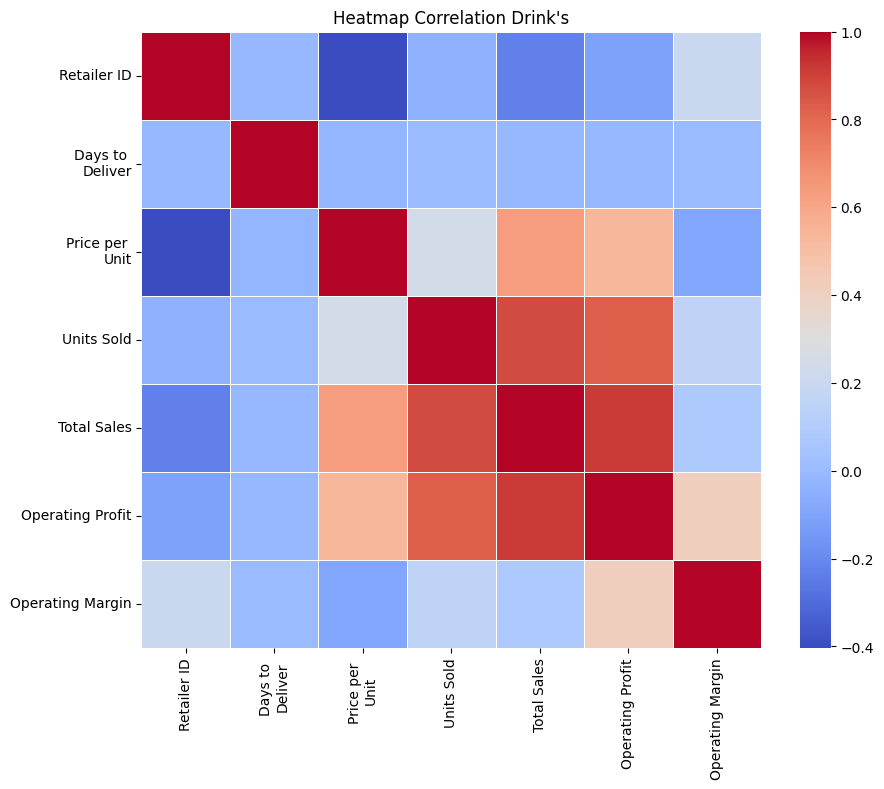

In [13]:


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_matrix_correlation,
                       annot=True, 
                       cmap="coolwarm", 
                       linewidths=0.5, fmt=".2f")

plt.title("Heatmap Correlation Drink's")
plt.show()

<Figure size 1000x800 with 0 Axes>

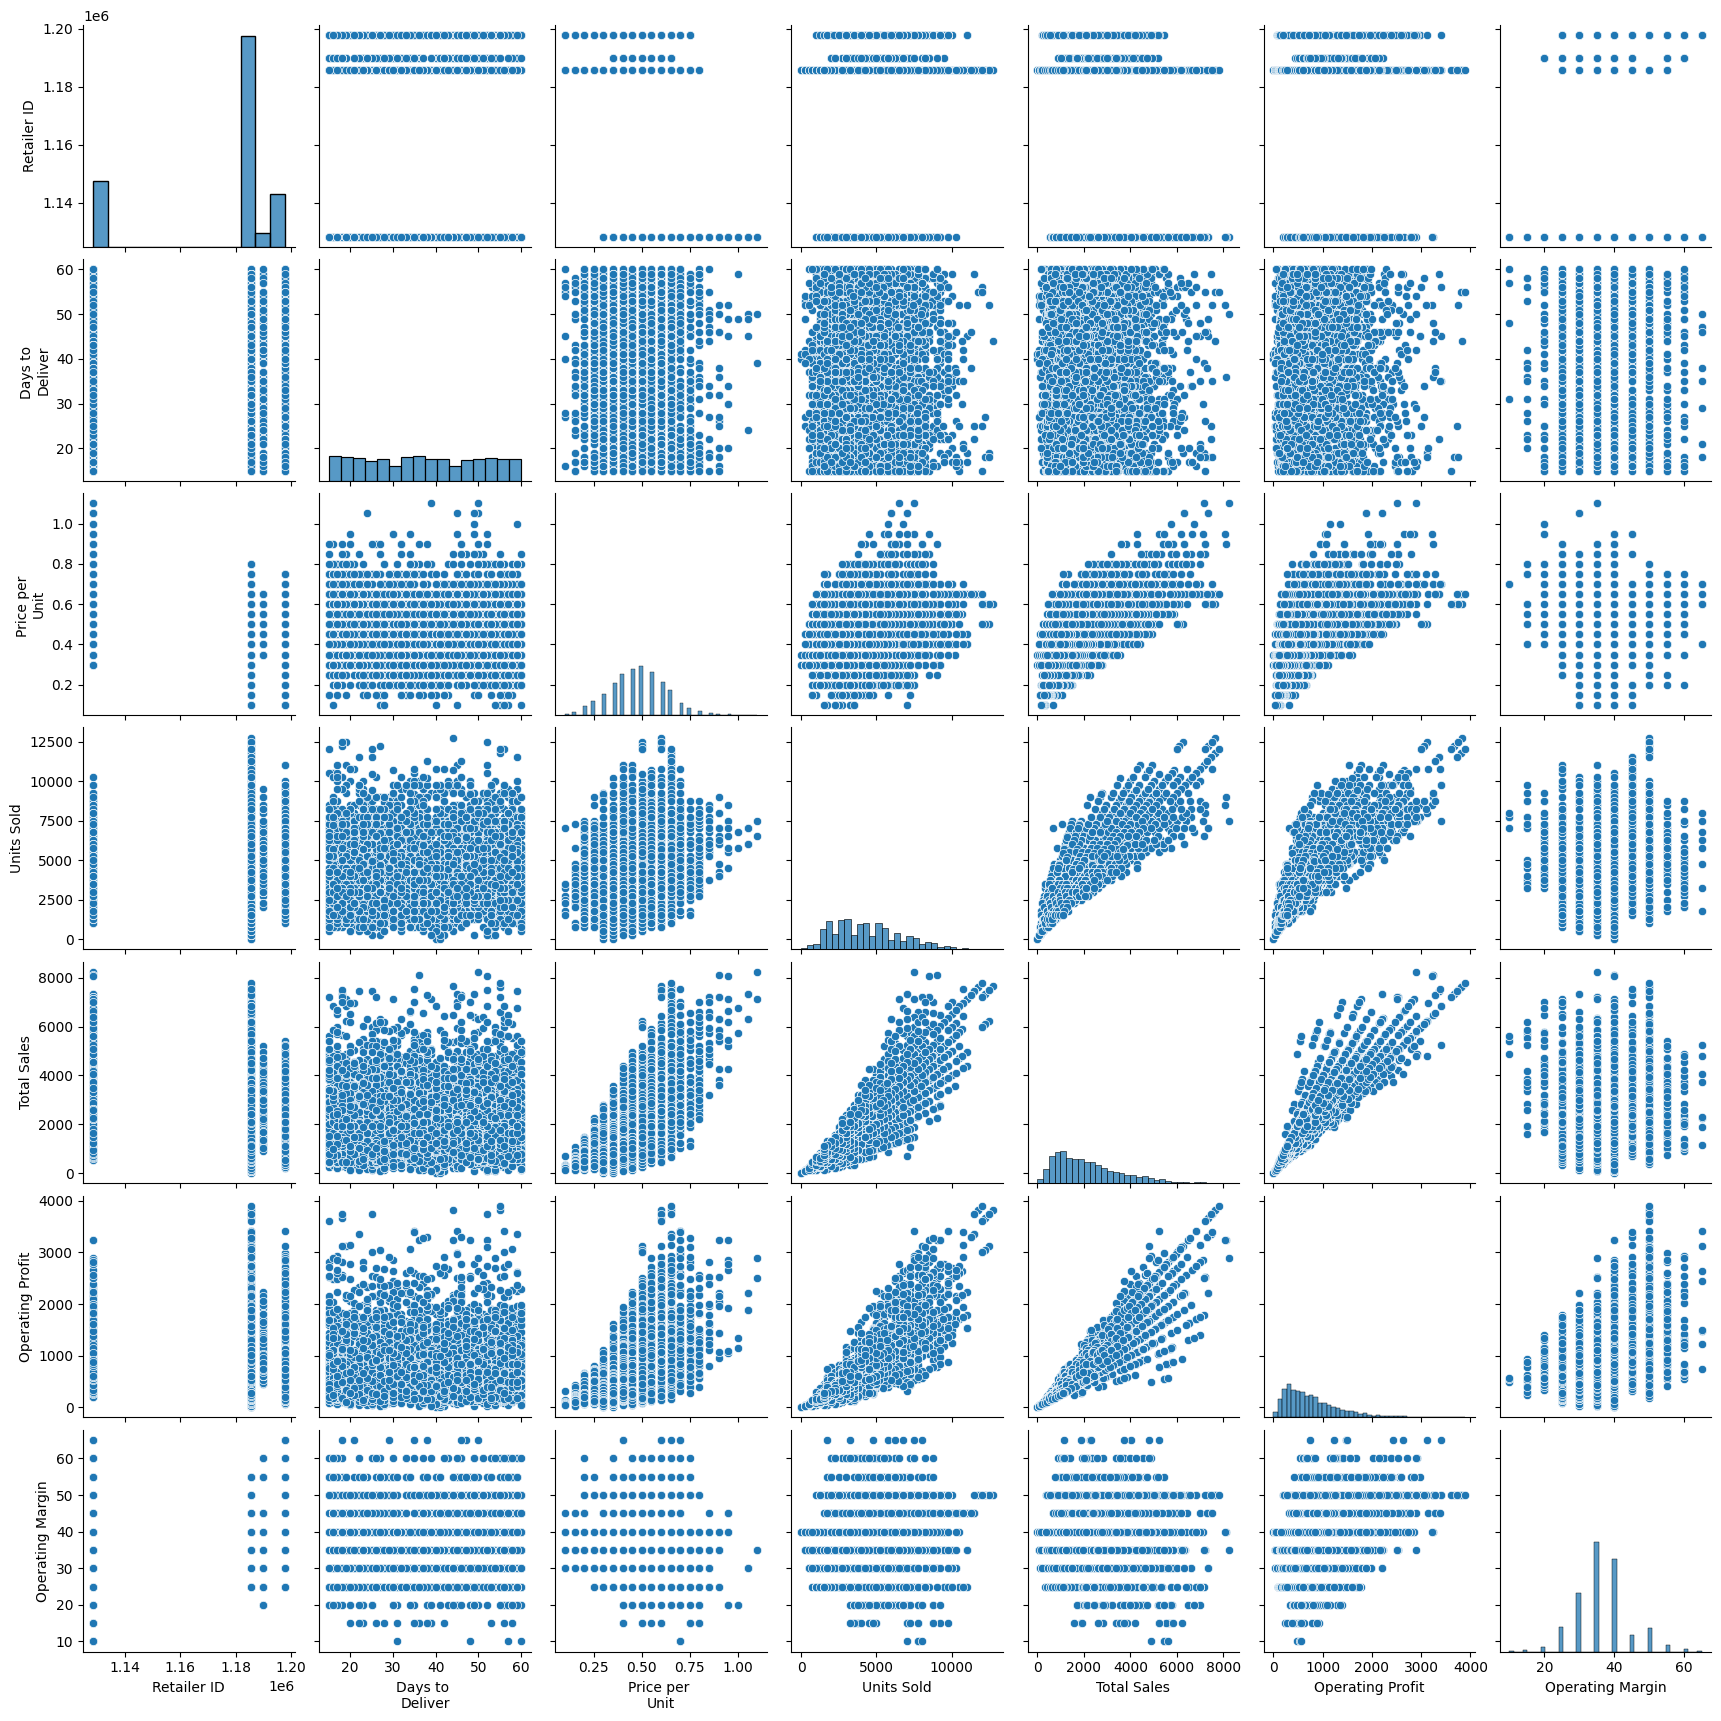

In [11]:

plt.figure(figsize=(10, 8))
sns.pairplot(data=df)

<Axes: xlabel='Total Sales', ylabel='Operating Profit'>

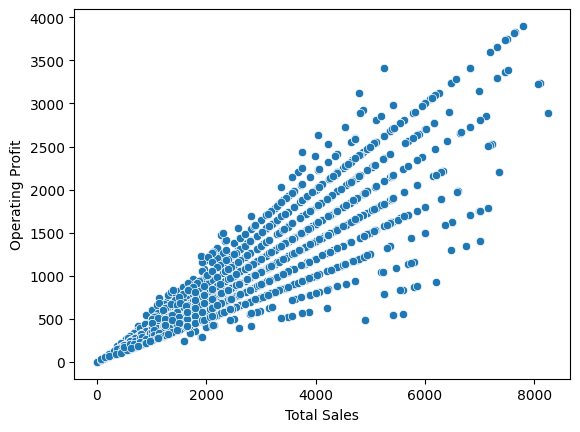

In [12]:
sns.scatterplot(df, x='Total Sales', y='Operating Profit')